[p=(0.78,0.71);h=3;cr=0.89;n=3
[p=(0.78,0.71);h=0;cr=0.00;n=0
[p=(0.15,0.08);h=2;cr=0.56;n=3
[p=(0.74,0.99);h=2;cr=0.39;n=3
[p=(0.15,0.08);h=0;cr=0.00;n=0
[p=(0.28,0.63);h=1;cr=0.30;n=3
[p=(0.15,0.08);h=1;cr=0.10;n=2
[p=(0.74,0.99);h=0;cr=0.00;n=0
[p=(0.67,0.69);h=0;cr=0.00;n=0
[p=(0.77,0.60);h=1;cr=0.36;n=3
[p=(0.28,0.63);h=0;cr=0.00;n=0
[p=(0.01,0.77);h=0;cr=0.00;n=0
[p=(0.13,0.50);h=0;cr=0.00;n=0
[p=(0.15,0.08);h=0;cr=0.00;n=0
[p=(0.24,0.12);h=0;cr=0.00;n=0
[p=(0.77,0.60);h=0;cr=0.00;n=0
[p=(0.95,0.29);h=0;cr=0.00;n=0
[p=(0.78,0.71);h=0;cr=0.00;n=0


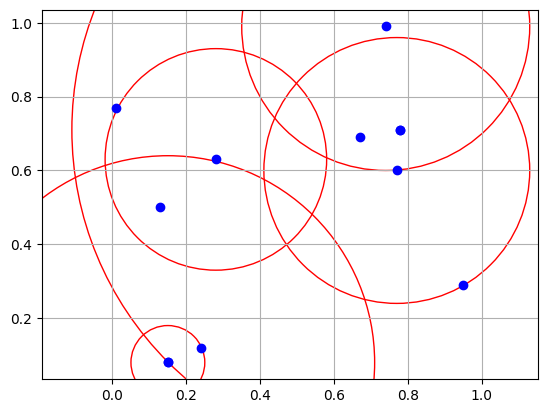

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Function to parse the custom data format
def parse_data(row):
    print(row)
    p_match = re.search(r'p=\(([^)]+)\)', row)
    h_match = re.search(r'h=(\d+)', row)
    cr_match = re.search(r'cr=(\d+.\d+)', row)
    n_match = re.search(r'n=(\d+)', row)
    
    if not (p_match and h_match and cr_match and n_match):
        return None  # Return None if any patterns do not match
    
    p = tuple(map(float, p_match.group(1).split(',')))
    h = int(h_match.group(1))
    cr = float(cr_match.group(1))
    n = int(n_match.group(1))
    return p, h, cr, n

# Read the CSV file
df = pd.read_csv('data.csv', header=None, delimiter="]")

# Prepare the plot
fig, ax = plt.subplots()

# Process each row in the DataFrame
for index, row in df.iterrows():
    result = parse_data(row[0])
    if result:
        p, h, cr, n = result
        if n == 0:
            ax.plot(p[0], p[1], 'bo')  # Plot a blue dot for n=0
        else:
            circle = plt.Circle(p, cr, color='r', fill=False)  # Draw a red circle for n!=0
            ax.add_artist(circle)

# Set equal scaling by setting the aspect ratio to 'equal'
ax.set_aspect('equal', adjustable='datalim')
plt.grid(True)
plt.show()
